<a href="https://colab.research.google.com/github/dharvi120/house-price-prediction-ml/blob/main/house_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importing**






In [14]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# ML tools
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [4]:
#loading dataset

data = fetch_california_housing()
# Convert to DataFrame
df = pd.DataFrame(data.data, columns=data.feature_names)
df["Price"] = data.target


#display first five rows
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


## **EDA**

In [7]:
df.info() #basic info
df.describe() #statistical summary
df.isnull().sum() #check missing values
df.duplicated().sum() #check duplicated values
df.nunique() #check unique


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   Price       20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


,0
MedInc,12928
HouseAge,52
AveRooms,19392
AveBedrms,14233
Population,3888
AveOccup,18841
Latitude,862
Longitude,844
Price,3842


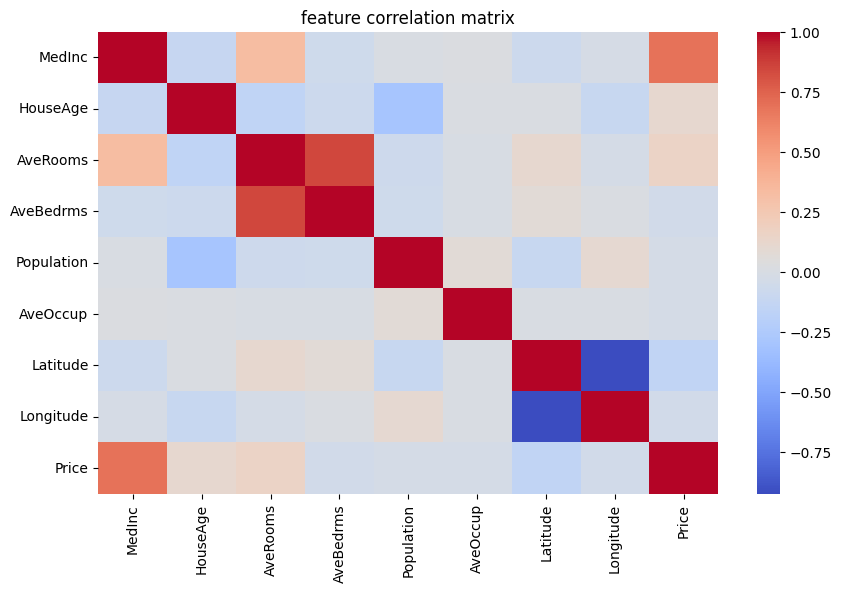

In [8]:
#correleational heatmap

plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),cmap ='coolwarm')
plt.title("feature correlation matrix")
plt.show()

In [9]:
df.corr()["Price"].sort_values(ascending=False)

,Price
Price,1.000000
MedInc,0.688075
AveRooms,0.151948
HouseAge,0.105623
AveOccup,-0.023737
Population,-0.024650
Longitude,-0.045967
AveBedrms,-0.046701
Latitude,-0.144160


# **Train Test split**

In [10]:
X=df.drop("Price", axis = 1)
y=df['Price']
X_train, X_test,y_train,y_test=train_test_split(
    X,y,test_size=0.2,random_state=42
    )
print("Training set size", X_train.shape)
print("Testing set size",X_test.shape)

Training set size (16512, 8)
Testing set size (4128, 8)


# **Model Training**

In [15]:
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

# **Evalution**

In [21]:
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R2 Score:", r2)

Mean Squared Error: 0.5558915986952444
R2 Score: 0.5757877060324508


## **Conclusion**

- A Linear Regression model was trained on the California Housing dataset.
- The model achieved an R2 score of approximately 0.576 .
- The model explains about 57.6% of the variance in housing prices.
- Linear regression provides a reasonable baseline model for price prediction.
- Further improvements can be made using feature scaling, regularization, or advanced models.

# **Feature Scaling**